In [1]:
import pandas as pd 
import numpy as np 

In [2]:
matchD = pd.read_csv('LaLiga_Matches.csv')

In [3]:
matchD.head(5)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [4]:
matchD['Season'].unique()

array(['1995-96', '1996-97', '1997-98', '1998-99', '1999-2000', '2000-01',
       '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
       '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22', '2022-23', '2023-24'],
      dtype=object)

In [5]:
matchD['FTR'].unique()

array(['H', 'A', 'D'], dtype=object)

In [6]:
matchD[['Date']] = matchD[['Date']].apply(lambda x : x.str[-4:])

In [7]:
matchD['Date'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [8]:
matchD['Date'] = matchD['Date'].astype(int)

In [9]:
matchU = matchD[matchD['Date'] >= 2000]

In [10]:
matchU['Date'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [11]:
matchU = matchU.drop('Season', axis = 1)

In [12]:
matchU['HTHG'] = matchU['HTHG'].astype(int)
matchU['HTAG'] = matchU['HTAG'].astype(int)


In [13]:
matchU

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
1854,2000,Valencia,Celta,1,1,D,1,0,H
1855,2000,Ath Bilbao,Espanol,2,1,H,1,1,D
1856,2000,Barcelona,Sociedad,3,1,H,2,0,H
1857,2000,La Coruna,Santander,0,3,A,0,1,A
1858,2000,Malaga,Zaragoza,0,0,D,0,0,D
...,...,...,...,...,...,...,...,...,...
10878,2023,Almeria,Granada,3,3,D,3,0,H
10879,2023,Alaves,Osasuna,0,2,A,0,1,A
10880,2023,Ath Madrid,Cadiz,3,2,H,1,2,A
10881,2023,Betis,Valencia,3,0,H,1,0,H


In [14]:
matchU.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
dtype: int64

In [15]:
matchU[['FTR']] = matchU[['FTR']].apply(lambda x : x.replace({'H':0 , 'A' : 1 , 'D' : 2}))

C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\1091475739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matchU[['FTR']] = matchU[['FTR']].apply(lambda x : x.replace({'H':0 , 'A' : 1 , 'D' : 2}))


In [16]:
matchU.FTR.head(5)

1854    2
1855    0
1856    0
1857    1
1858    2
Name: FTR, dtype: int64

In [17]:
matchU[['HTR']] = matchU[['HTR']].apply(lambda x : x.replace({'H':0 , 'A' : 1 , 'D' : 2}))

C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\3262491821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matchU[['HTR']] = matchU[['HTR']].apply(lambda x : x.replace({'H':0 , 'A' : 1 , 'D' : 2}))


In [18]:
matchU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 1854 to 10882
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9029 non-null   int32 
 1   HomeTeam  9029 non-null   object
 2   AwayTeam  9029 non-null   object
 3   FTHG      9029 non-null   int64 
 4   FTAG      9029 non-null   int64 
 5   FTR       9029 non-null   int64 
 6   HTHG      9029 non-null   int32 
 7   HTAG      9029 non-null   int32 
 8   HTR       9029 non-null   int64 
dtypes: int32(3), int64(4), object(2)
memory usage: 599.6+ KB


In [19]:
matchU.HomeTeam.unique()

array(['Valencia', 'Ath Bilbao', 'Barcelona', 'La Coruna', 'Malaga',
       'Mallorca', 'Numancia', 'Oviedo', 'Sevilla', 'Espanol', 'Alaves',
       'Ath Madrid', 'Betis', 'Celta', 'Santander', 'Sociedad',
       'Vallecano', 'Zaragoza', 'Valladolid', 'Real Madrid', 'Las Palmas',
       'Osasuna', 'Villarreal', 'Tenerife', 'Recreativo', 'Albacete',
       'Murcia', 'Getafe', 'Levante', 'Cadiz', 'Gimnastic', 'Almeria',
       'Sp Gijon', 'Xerez', 'Hercules', 'Granada', 'Elche', 'Eibar',
       'Cordoba', 'Leganes', 'Girona', 'Huesca'], dtype=object)

In [20]:
matchU = matchU.sample(matchU.shape[0])

In [21]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

trf = ColumnTransformer([
    ('trf', OneHotEncoder( drop = 'first') , ['HomeTeam' , 'AwayTeam'])
]
,remainder = 'passthrough')

In [22]:
from sklearn.model_selection import train_test_split
X = matchU.drop(['FTR'] , axis = 1)
y = matchU['FTR']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
pipe = Pipeline(steps=[
    ('step1' , trf),
    ('step2' , LogisticRegression())
])

In [25]:
pipe2 = Pipeline(steps=[
    ('step1' , trf),
    ('step2' , RandomForestClassifier())
])

In [26]:
pipe.fit(X_train , y_train)

C:\Users\kswap\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['HomeTeam', 'AwayTeam'])])),
                ('step2', LogisticRegression())])

In [27]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['HomeTeam', 'AwayTeam'])])),
                ('step2', RandomForestClassifier())])

In [28]:
y_p1 = pipe.predict(X_test)
accuracy_score(y_test , y_p1)

0.9966777408637874

In [29]:
y_p2 = pipe2.predict(X_test)
accuracy_score(y_test , y_p2)

0.9955703211517165

In [30]:
pipe2.predict_proba(X_test)[51]

array([1., 0., 0.])

### BARCA STAT CHECK

In [31]:
barD = matchU[(matchU['HomeTeam'] == 'Barcelona') | (matchU['AwayTeam'] == 'Barcelona')]


In [32]:
barD

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
6008,2010,Barcelona,Sociedad,5,0,0,2,0,0
4536,2007,Barcelona,Celta,3,1,0,1,0,0
8228,2016,Valencia,Barcelona,2,3,1,0,1,1
10002,2021,Valencia,Barcelona,2,3,1,0,0,2
10162,2021,Celta,Barcelona,3,3,2,0,3,1
...,...,...,...,...,...,...,...,...,...
10800,2023,Celta,Barcelona,2,1,0,1,0,0
10631,2023,Villarreal,Barcelona,0,1,1,0,1,1
2282,2001,Santander,Barcelona,4,0,0,1,0,0
2328,2001,Numancia,Barcelona,1,1,2,0,1,1


In [33]:
def update_goals(df):
    if df['HomeTeam'] == 'Barcelona':
        df['barG'] == df['FTHG']
        df['oppG'] == df['FTAG']
        df['barHG'] == df['HTHG']
        df['oppHG'] == df['HTAG']
        
    elif df['AwayTeam'] == 'Barcelona':
        df['barG'] == df['FTAG']
        df['oppG'] == df['FTHG']
        df['barHG'] == df['HTAG']
        df['oppHG'] == df['HTHG']
        
    return df
        
        

In [34]:
barD['barG'] = 0
barD['oppG'] = 0
barD['barHG'] = 0
barD['oppHG'] = 0

C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\3550326329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barD['barG'] = 0
C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\3550326329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barD['oppG'] = 0
C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\3550326329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [35]:
barD.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,barG,oppG,barHG,oppHG
6008,2010,Barcelona,Sociedad,5,0,0,2,0,0,0,0,0,0
4536,2007,Barcelona,Celta,3,1,0,1,0,0,0,0,0,0
8228,2016,Valencia,Barcelona,2,3,1,0,1,1,0,0,0,0
10002,2021,Valencia,Barcelona,2,3,1,0,0,2,0,0,0,0
10162,2021,Celta,Barcelona,3,3,2,0,3,1,0,0,0,0


In [36]:
barD[['barG' , 'oppG' , 'barHG' , 'oppHG']] = barD.apply(update_goals , axis = 1)[['FTHG' , 'FTAG' , 'HTHG' , 'HTAG']]

C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\4118830580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barD[['barG' , 'oppG' , 'barHG' , 'oppHG']] = barD.apply(update_goals , axis = 1)[['FTHG' , 'FTAG' , 'HTHG' , 'HTAG']]


In [37]:
barD.drop(columns = ['FTHG' , 'FTAG', 'HTHG' , 'HTAG'] , axis = 1 ,  inplace = True)

C:\Users\kswap\AppData\Local\Temp\ipykernel_3428\3380096949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barD.drop(columns = ['FTHG' , 'FTAG', 'HTHG' , 'HTAG'] , axis = 1 ,  inplace = True)


In [38]:
barD

,Date,HomeTeam,AwayTeam,FTR,HTR,barG,oppG,barHG,oppHG
6008,2010,Barcelona,Sociedad,0,0,5,0,2,0
4536,2007,Barcelona,Celta,0,0,3,1,1,0
8228,2016,Valencia,Barcelona,1,1,2,3,0,1
10002,2021,Valencia,Barcelona,1,2,2,3,0,0
10162,2021,Celta,Barcelona,2,1,3,3,0,3
...,...,...,...,...,...,...,...,...,...
10800,2023,Celta,Barcelona,0,0,2,1,1,0
10631,2023,Villarreal,Barcelona,1,1,0,1,0,1
2282,2001,Santander,Barcelona,0,0,4,0,1,0
2328,2001,Numancia,Barcelona,2,1,1,1,0,1


In [43]:
barSeason = barD.groupby(['Date'])['barG'].mean().reset_index()

In [44]:
barSeason

,Date,barG
0,2000,1.729730
1,2001,1.975000
2,2002,1.714286
3,2003,1.600000
4,2004,1.710526
5,2005,1.578947
6,2006,1.666667
7,2007,1.625000
8,2008,2.162162
9,2009,2.000000


Text(0.5, 1.0, 'Goals per season')

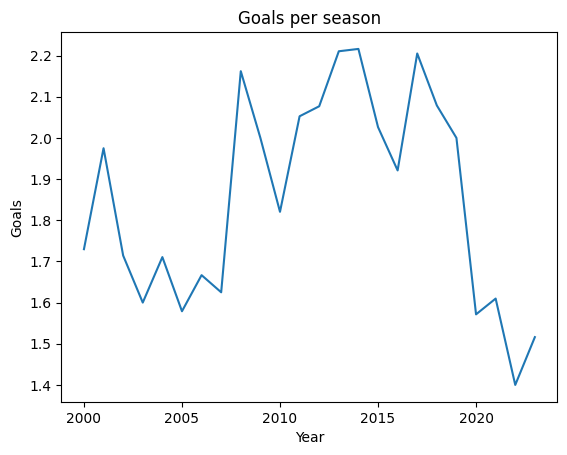

In [45]:
import matplotlib.pyplot as plt 

x = barSeason['Date']
y = barSeason['barG']

plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Goals")
plt.title('Goals per season')